## DAB 304 - HEALTHCARE ANALYTICS PROJECT

### Group 5 members:
Gowtham Chandu

Kenechukwu Enem

LingFang He

Venkata Dhanayya

Sanjana Indu

### Brief Overview of dataset

We are using the Heart Failure Clinical Records Dataset, which we obtained from the UCI Machine Learning Repository. This dataset comprises the medical records of 299 patients who experienced heart failure. It includes 11 clinical features, a follow-up duration, and a target variable labeled DEATH_EVENT, indicating whether or not the patient died during the follow-up period.

The features consist of both numerical and binary variables. Some are directly related to clinical indicators such as serum sodium, serum creatinine, platelet count, and levels of enzymes while others reflect more general patient characteristics like age, sex, and smoking status. This combination of variables allows for a comprehensive analysis of the factors contributing to heart failure outcomes.

### Heart Failure Clinical Records Dataset – Feature Description

|  **Feature**                  | **Explanation**                                                | **Measurement**        | **Range**              |
|-----------------------------|----------------------------------------------------------------|------------------------|------------------------|
| `age`                       | Age of the patient                                              | Years                  | 40,... 95                |
| `anaemia`                   | Decrease of red blood cells or hemoglobin                      | Boolean (0 = No, 1 = Yes) | 0, 1               |
| `creatinine_phosphokinase` | Level of the CPK enzyme in the blood                           | mcg/L                  | 23,... 7861              |
| `diabetes`                  | If the patient has diabetes                                     | Boolean (0 = No, 1 = Yes) | 0, 1               |
| `ejection_fraction`         | Percentage of blood leaving the heart at each contraction      | Percentage             | 14,... 80                |
| `high_blood_pressure`       | If the patient has hypertension                                | Boolean (0 = No, 1 = Yes) | 0, 1               |
| `platelets`                 | Platelet count in the blood                                    | kiloplatelets/mL       | 25.01, ... 850.00         |
| `serum_creatinine`          | Level of creatinine in the blood                               | mg/dL                  | 0.50,... 9.40            |
| `serum_sodium`              | Level of sodium in the blood                                   | mEq/L                  | 114,... 148              |
| `sex`                       | Sex of the patient (0 = Female, 1 = Male)                      | Binary                 | 0, 1                   |
| `smoking`                   | If the patient smokes                                          | Boolean (0 = No, 1 = Yes) | 0, 1               |
| `time`                      | Follow-up period                                               | Days                   | 4,... 285                |
| `DEATH_EVENT`               | If the patient died during the follow-up period                | Boolean (0 = No, 1 = Yes) | 0, 1               |


### Exploratory Data Analysis



In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, confusion_matrix, roc_auc_score
from imblearn.over_sampling import SMOTE
from sklearn.pipeline import Pipeline
import xgboost as xgb
import lightgbm as lgb
import math
import warnings

warnings.filterwarnings('ignore')

In [3]:
# Load the dataset
df = pd.read_csv("/content/heart_failure_clinical_records_dataset (1).xls")
print("Dataset loaded successfully.")
display(df.head())
print("\nDataset Info:")
display(df.info())
print("\nDescriptive Statistics:")
display(df.describe())

Dataset loaded successfully.


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


None


Descriptive Statistics:


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


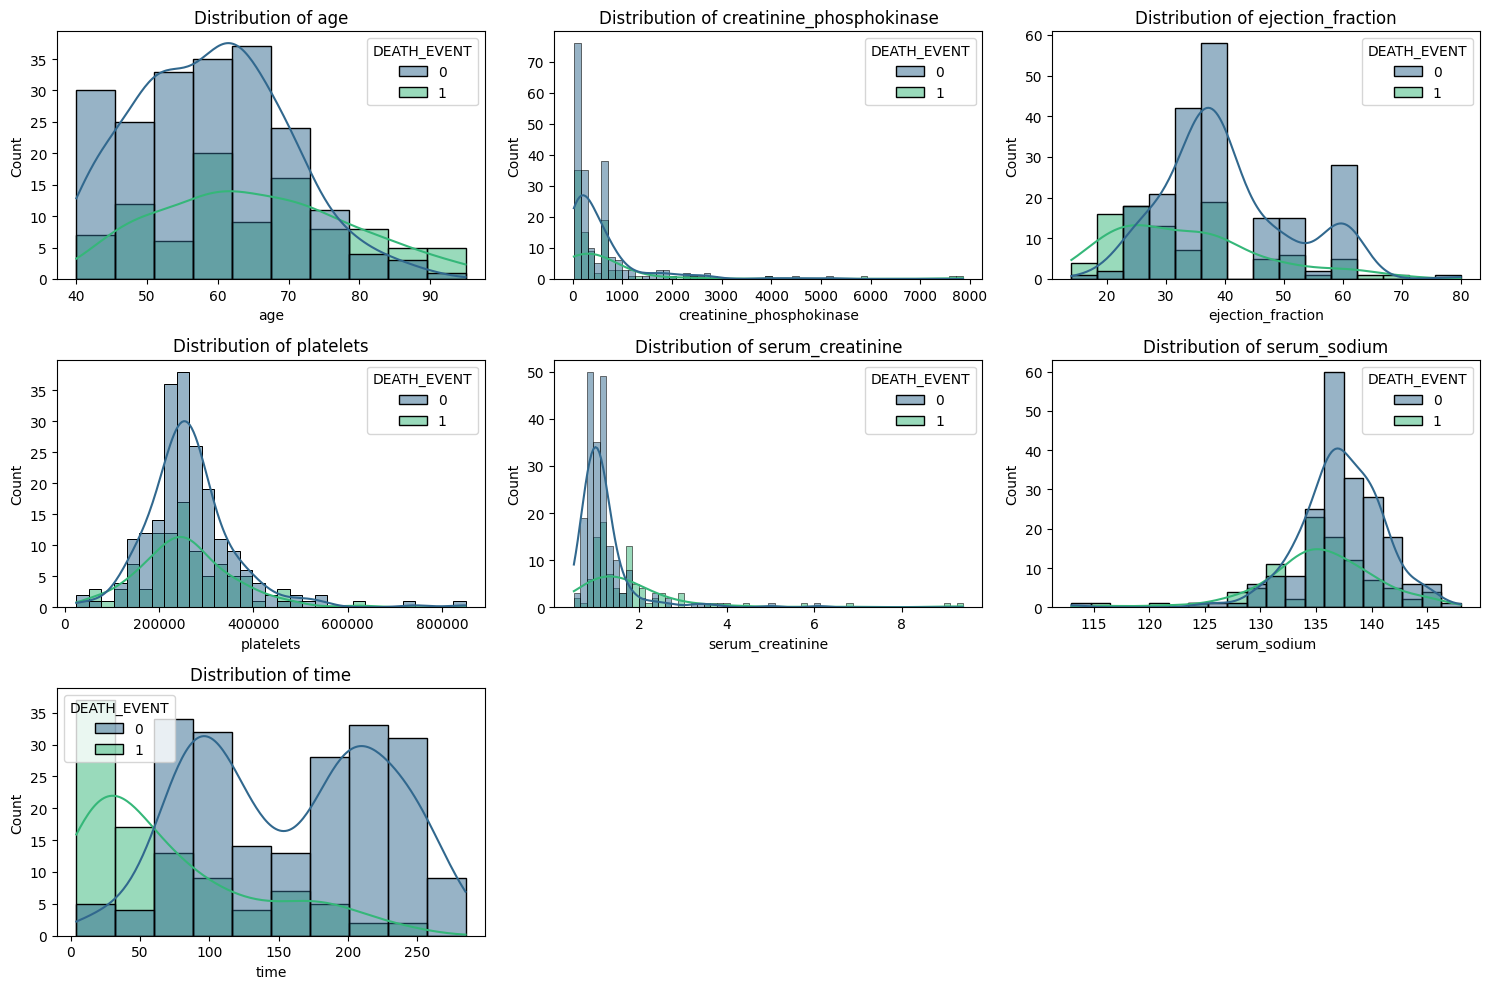

In [5]:
# Visualize distributions of numerical features
numerical_features = ["age", "creatinine_phosphokinase", "ejection_fraction", "platelets", "serum_creatinine", "serum_sodium", "time"]
plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features):
    plt.subplot(3, 3, i + 1)
    sns.histplot(data=df, x=feature, kde=True, hue="DEATH_EVENT", palette='viridis')
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

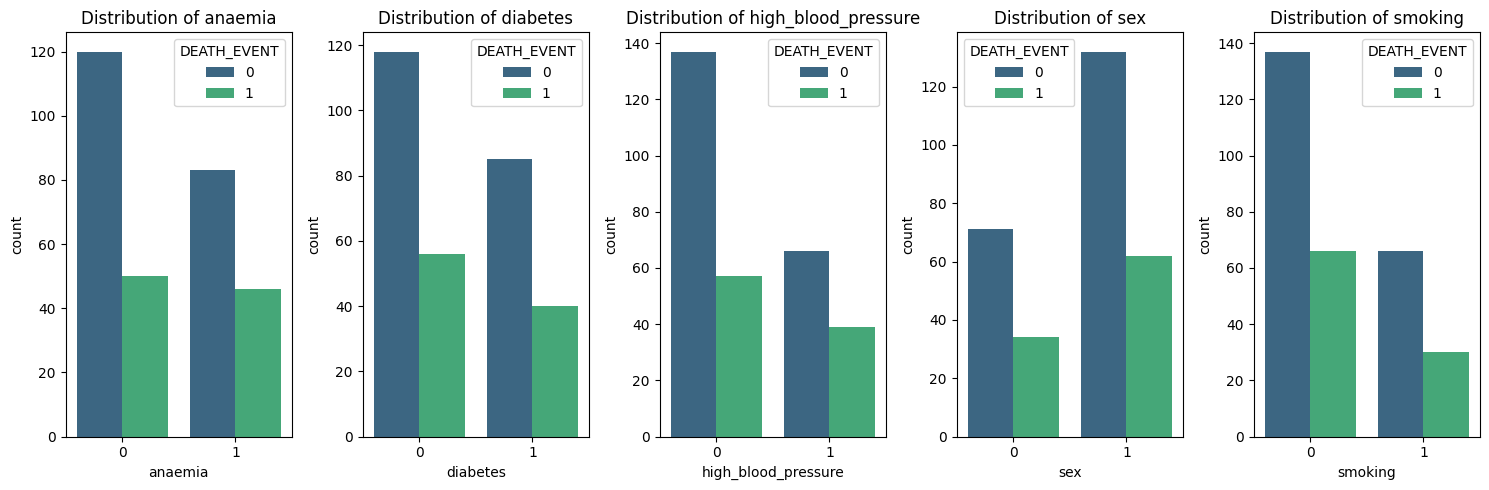

In [6]:
# Visualize distributions of categorical features
categorical_features = ["anaemia", "diabetes", "high_blood_pressure", "sex", "smoking"]
plt.figure(figsize=(15, 5))
for i, feature in enumerate(categorical_features):
    plt.subplot(1, 5, i + 1)
    sns.countplot(data=df, x=feature, hue="DEATH_EVENT", palette='viridis')
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

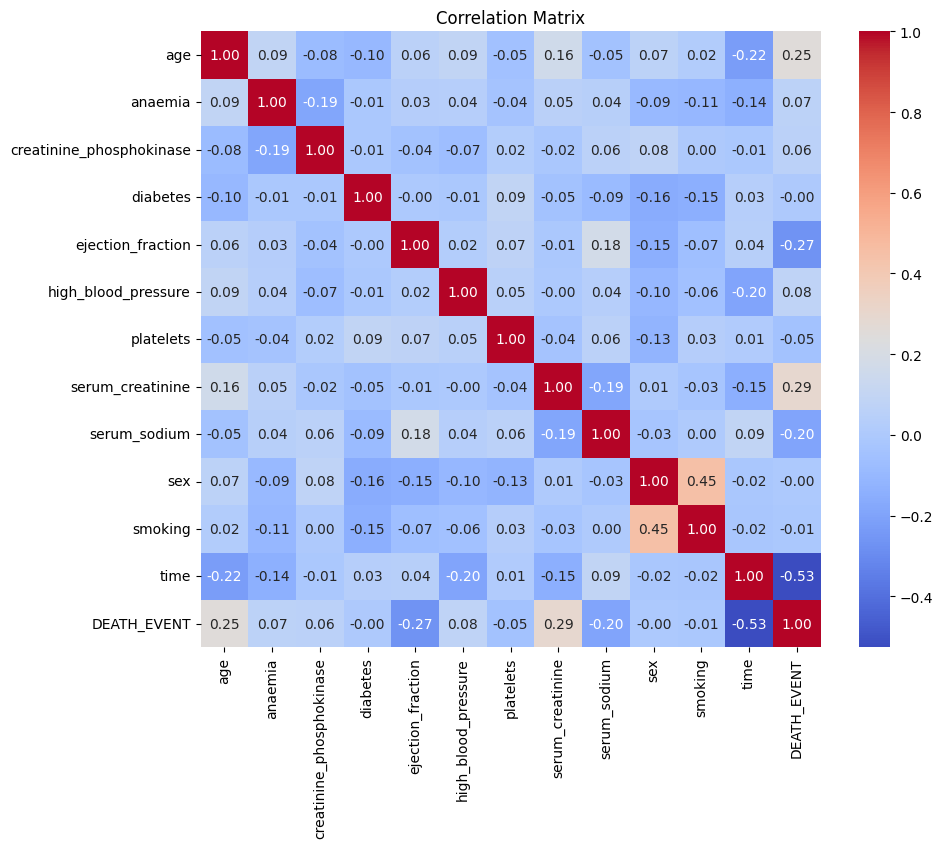

In [7]:
 # Correlation Matrix
 plt.figure(figsize=(10, 8))
 sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
 plt.title("Correlation Matrix")
 plt.show()

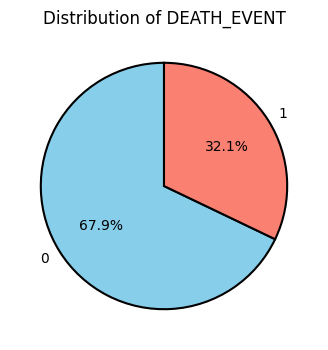


Class distribution:
DEATH_EVENT
0    203
1     96
Name: count, dtype: int64


In [8]:
# Check for class imbalance in the target variable
plt.figure(figsize=(4, 4))
df["DEATH_EVENT"].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['skyblue', 'salmon'], wedgeprops={'edgecolor':'black', 'linewidth': 1.5})
plt.title('Distribution of DEATH_EVENT')
plt.ylabel('')
plt.show()
print("\nClass distribution:")
print(df["DEATH_EVENT"].value_counts())

The dataset was loaded and initial exploration was performed, including displaying the first few rows, info, and descriptive statistics. Visualizations (histograms for numerical features and count plots for categorical features) were generated to understand the distribution of features and their relationship with the DEATH_EVENT. A correlation matrix was plotted to show the relationships between features. Class imbalance in the DEATH_EVENT target variable was identified, with fewer instances of death events.

### Handling Class Imbalance and Data Augmentation

We will use SMOTE to address the class imbalance in the training data and then augment the data by adding noise to increase the dataset size to over 10,000 rows.

In [9]:
if df is not None:
    # Prepare data for modeling
    X = df.drop("DEATH_EVENT", axis=1)
    y = df["DEATH_EVENT"]

    # Split data into training and testing sets (80/20 split)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

    print("Original training data shape:", X_train.shape)
    print("Original test data shape:", X_test.shape)
    print("\nOriginal training class distribution:")
    print(y_train.value_counts())

    # Apply SMOTE to the training data
    smote = SMOTE(sampling_strategy='auto', random_state=42, k_neighbors=5) # Use 'auto' to balance classes
    X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

    print("\nClass distribution after SMOTE:")
    print(pd.Series(y_train_res).value_counts())
    print(f"Total rows after SMOTE: {len(X_train_res)}")

    # Data Augmentation: Add noise to numerical features
    def augment_data(X, y, noise_factor=0.05, target_rows=10000):
        X_augmented = X.copy()
        y_augmented = y.copy()
        current_size = len(X)

        if current_size >= target_rows:
            print("Current data size already meets or exceeds target rows for augmentation.")
            return X, y

        # Calculate the number of copies needed
        # Total size = current_size + n_copies * current_size = current_size * (1 + n_copies)
        # We want current_size * (1 + n_copies) >= target_rows
        # 1 + n_copies >= target_rows / current_size
        # n_copies >= (target_rows / current_size) - 1

        n_copies_needed = math.ceil((target_rows / current_size) - 1)
        # Add a buffer to ensure it's well over the target
        n_copies_to_add = max(n_copies_needed, 1) # Ensure at least one copy if needed

        print(f"\nAugmenting data by adding {n_copies_to_add} copies")

        # Identify numerical columns for augmentation
        numerical_cols = X.select_dtypes(include=np.number).columns.tolist()

        for _ in range(n_copies_to_add):
            noise = np.random.normal(0, noise_factor, X[numerical_cols].shape)
            X_noisy_numerical = X[numerical_cols] + noise
            X_noisy = X.copy()
            X_noisy[numerical_cols] = X_noisy_numerical # Apply noise only to numerical columns

            X_augmented = pd.concat([X_augmented, X_noisy], ignore_index=True)
            y_augmented = pd.concat([y_augmented, y], ignore_index=True)


        print(f"Total rows after augmentation: {len(X_augmented)}")
        print("Class distribution after augmentation:")
        print(y_augmented.value_counts())


        return X_augmented, y_augmented

    # Apply augmentation to the SMOTE-resampled training data to reach over 10000 rows
    X_train_aug, y_train_aug = augment_data(X_train_res, y_train_res, noise_factor=0.05, target_rows=10001)

    # Convert to numpy arrays for scaling and model training if they are not already
    if isinstance(X_train_aug, pd.DataFrame):
        X_train_aug_np = X_train_aug.values
    else:
        X_train_aug_np = X_train_aug

    if isinstance(X_test, pd.DataFrame):
        X_test_np = X_test.values
    else:
        X_test_np = X_test


    # Scale the features using the scaler fitted on the augmented data
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train_aug_np)
    X_test_scaled = scaler.transform(X_test_np)

    print("\nData preparation and scaling complete.")

Original training data shape: (239, 12)
Original test data shape: (60, 12)

Original training class distribution:
DEATH_EVENT
0    162
1     77
Name: count, dtype: int64

Class distribution after SMOTE:
DEATH_EVENT
0    162
1    162
Name: count, dtype: int64
Total rows after SMOTE: 324

Augmenting data by adding 30 copies with noise...
Total rows after augmentation: 10044
Class distribution after augmentation:
DEATH_EVENT
0    5022
1    5022
Name: count, dtype: int64

Data preparation and scaling complete.


To address the class imbalance, we split the data into training and testing sets. Class imbalance can lead to models that are biased towards the majority class so we applied SMOTE to the training data to oversample the minority class. (DEATH_EVENT = 1).
Data augmentation was performed by adding noise to the numerical features of the SMOTE-resampled training data to increase the dataset size to over 10,000 rows. This aimed to provide more data for the models to learn from. Scaling was done for many machine learning algorithms that are sensitive to the scale of the input features.

### Model Validation and Evaluation
We will define several classification models, perform hyperparameter tuning for each using cross-validation on the augmented training data, and then evaluate the best-tuned models on the test set.

In [10]:
if 'X_train_scaled' in locals() and 'y_train_aug' in locals() and 'X_test_scaled' in locals() and 'y_test' in locals():
    # Define models
    models = {
        "Logistic Regression": LogisticRegression(random_state=42),
        "Support Vector Machine": SVC(probability=True, random_state=42),
        "Decision Tree": DecisionTreeClassifier(random_state=42),
        "Bagging": BaggingClassifier(estimator=DecisionTreeClassifier(), random_state=42),
        "XGBoost": xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'),
        "LightGBM": lgb.LGBMClassifier(random_state=42)
    }

    # Define parameter grids for hyperparameter tuning
    param_grids = {
        "Logistic Regression": {
            'model__C': [0.001, 0.01, 0.1, 1, 10, 100],
            'model__penalty': ['l2'],
            'model__solver': ['liblinear', 'lbfgs']
        },
        "Support Vector Machine": {
            'model__C': [0.1, 1, 10, 100],
            'model__gamma': ['scale', 'auto'],
            'model__kernel': ['rbf', 'linear']
        },
        "Decision Tree": {
            'model__max_depth': [None, 10, 20, 30],
            'model__min_samples_split': [2, 5, 10],
            'model__min_samples_leaf': [1, 2, 4]
        },
        "Bagging": {
            'model__n_estimators': [10, 50, 100],
            'model__max_samples': [0.5, 0.7, 1.0],
            'model__max_features': [0.5, 0.7, 1.0]
        },
        "XGBoost": {
            'model__n_estimators': [50, 100, 200],
            'model__learning_rate': [0.01, 0.1, 0.2],
            'model__max_depth': [3, 5, 7],
            'model__subsample': [0.7, 1.0],
            'model__colsample_bytree': [0.7, 1.0]
        },
        "LightGBM": {
            'model__n_estimators': [50, 100, 200],
            'model__learning_rate': [0.01, 0.1, 0.2],
            'model__num_leaves': [31, 50, 100],
            'model__min_child_samples': [20, 50, 100]
        }
    }

    tuned_results = {}
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42) # Using 5 folds for faster tuning

    # Perform GridSearchCV for each model and evaluate on test set
    for name, model in models.items():
        if name in param_grids:
            print(f"Performing GridSearchCV for {name}...")
            pipeline = Pipeline([('scaler', StandardScaler()), ('model', model)])

            grid_search = GridSearchCV(pipeline, param_grids[name], cv=cv, scoring='f1', n_jobs=-1)

            # Fit GridSearchCV on the scaled augmented training data
            grid_search.fit(X_train_scaled, y_train_aug)

            # Store best parameters and best cross-validation score
            tuned_results[name] = {
                "Best Parameters": grid_search.best_params_,
                "Best CV F1-score": grid_search.best_score_
            }

            # Evaluate the best model on the test set
            best_model = grid_search.best_estimator_
            y_pred = best_model.predict(X_test_scaled)

            tuned_results[name]["Test Accuracy"] = accuracy_score(y_test, y_pred)
            tuned_results[name]["Test Precision"] = precision_score(y_test, y_pred)
            tuned_results[name]["Test Recall"] = recall_score(y_test, y_pred)
            tuned_results[name]["Test F1-Score"] = f1_score(y_test, y_pred)
            try:
                 y_prob = best_model.predict_proba(X_test_scaled)[:, 1]
                 tuned_results[name]["Test ROC_AUC"] = roc_auc_score(y_test, y_prob)
                 # Store FPR and TPR for ROC curve plotting
                 fpr, tpr, _ = roc_curve(y_test, y_prob)
                 tuned_results[name]["Test_FPR"] = fpr
                 tuned_results[name]["Test_TPR"] = tpr
            except:
                 tuned_results[name]["Test ROC_AUC"] = np.nan
                 tuned_results[name]["Test_FPR"] = None
                 tuned_results[name]["Test_TPR"] = None


            print(f"Finished GridSearchCV for {name}.")
            print("-" * 30)

    # Print all tuned results
    print("\n--- Tuned Model Performance on Test Set ---")
    for name, metrics in tuned_results.items():
        print(f"{name}:")
        print(f"  Best Parameters: {metrics['Best Parameters']}")
        print(f"  Best CV F1-score: {metrics['Best CV F1-score']:.2f}")
        print(f"  Test Accuracy: {metrics['Test Accuracy']:.2f}")
        print(f"  Test Precision: {metrics['Test Precision']:.2f}")
        print(f"  Test Recall: {metrics['Test Recall']:.2f}")
        print(f"  Test F1-Score: {metrics['Test F1-Score']:.2f}")
        print(f"  Test ROC_AUC: {metrics['Test ROC_AUC']:.2f}")
        print("-" * 30)

else:
    print("Data preparation or scaling was not completed successfully. Model training skipped.")

Performing GridSearchCV for Logistic Regression...
Finished GridSearchCV for Logistic Regression.
------------------------------
Performing GridSearchCV for Support Vector Machine...
Finished GridSearchCV for Support Vector Machine.
------------------------------
Performing GridSearchCV for Decision Tree...
Finished GridSearchCV for Decision Tree.
------------------------------
Performing GridSearchCV for Bagging...
Finished GridSearchCV for Bagging.
------------------------------
Performing GridSearchCV for XGBoost...
Finished GridSearchCV for XGBoost.
------------------------------
Performing GridSearchCV for LightGBM...
[LightGBM] [Info] Number of positive: 5022, number of negative: 5022
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002223 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3060
[LightGBM] [Info] Number of data points in the train set: 10044, number of used features: 12
[LightGBM] 

We defined several classification models. Performed hyperparameter tuning using GridSearchCV with Stratified K-Fold cross-validation on the scaled, augmented training data for each model, optimizing for the F1-score. we also evaluated the best-tuned models on the held-out test set using various metrics (Accuracy, Precision, Recall, F1-Score, ROC AUC). It was identified that XGBoost had the highest test accuracy of 0.85

### Model Performance Visualization

We will visualize the Confusion matrix for best model, performance metrics and ROC curves for the tuned models on the test set.

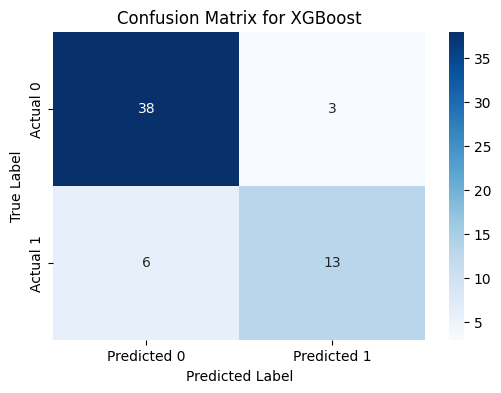

In [14]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

if 'tuned_results' in locals() and 'X_test_scaled' in locals() and 'y_test' in locals():
    # Get the best performing model, which was identified as XGBoost
    best_model_name = "XGBoost"
    if best_model_name in tuned_results:
        # Retrieve the best estimator from the grid search results
        best_params = tuned_results[best_model_name]["Best Parameters"]
        model_params = {k.replace('model__', ''): v for k, v in best_params.items()}
        original_model_class = models[best_model_name].__class__
        model = original_model_class(**model_params, random_state=42)

        # Need to refit the best model within a pipeline with the scaler
        pipeline = Pipeline([('scaler', StandardScaler()), ('model', model)])
        # Fit on the scaled augmented training data (as done during tuning)
        # Note: In a real-world scenario, you would save and load the fitted pipeline.
        # For this notebook's context, we refit the best model and scaler.
        pipeline.fit(X_train_scaled, y_train_aug)


        # Make predictions on the scaled test data
        y_pred = pipeline.predict(X_test_scaled)

        # Generate the confusion matrix
        cm = confusion_matrix(y_test, y_pred)

        # Visualize the confusion matrix
        plt.figure(figsize=(6, 4))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
        plt.xlabel('Predicted Label')
        plt.ylabel('True Label')
        plt.title(f'Confusion Matrix for {best_model_name}')
        plt.show()

    else:
        print(f"Best performing model '{best_model_name}' not found in tuned_results.")
else:
    print("Required variables (tuned_results, X_test_scaled, y_test) not found. Please run previous cells.")

The confusion matrix is a table that summarizes the performance of a classification algorithm. In this case, it shows how many predictions were correct and incorrect for each class (DEATH_EVENT 0 and 1).

By looking at the values in your generated confusion matrix for XGBoost, you can see:

TN: 38 patients who survived were correctly identified as survivors.

FP: 3 patients who survived were incorrectly identified as having a DEATH_EVENT.

FN: 6 patients who had a DEATH_EVENT were incorrectly identified as survivors.

TP: 13 patients who had a DEATH_EVENT were correctly identified as having a DEATH_EVENT.

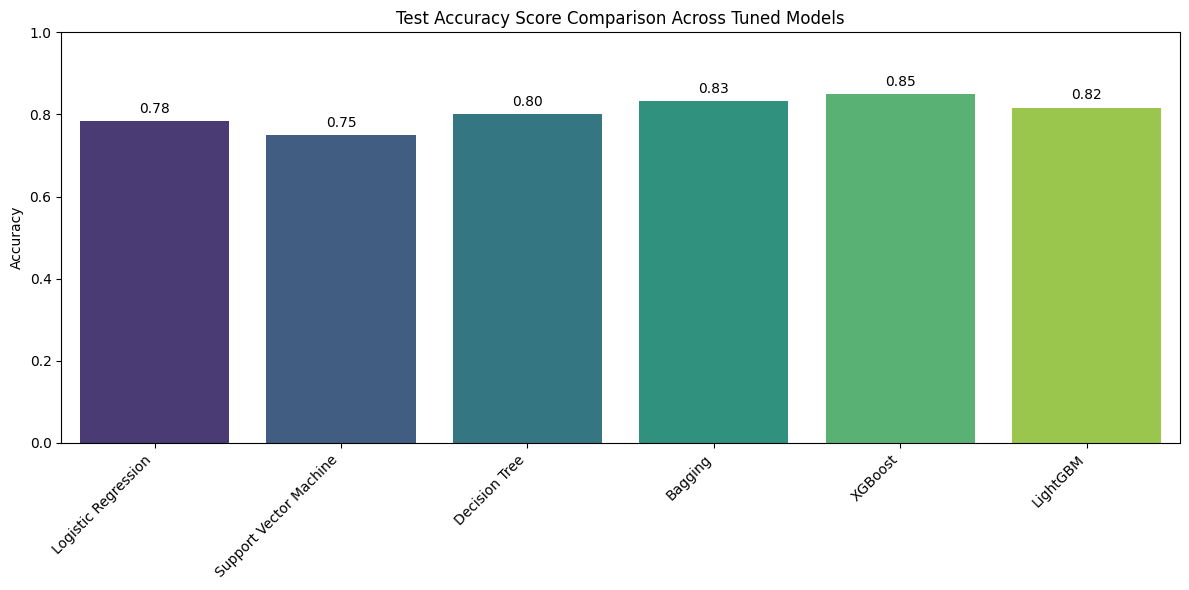

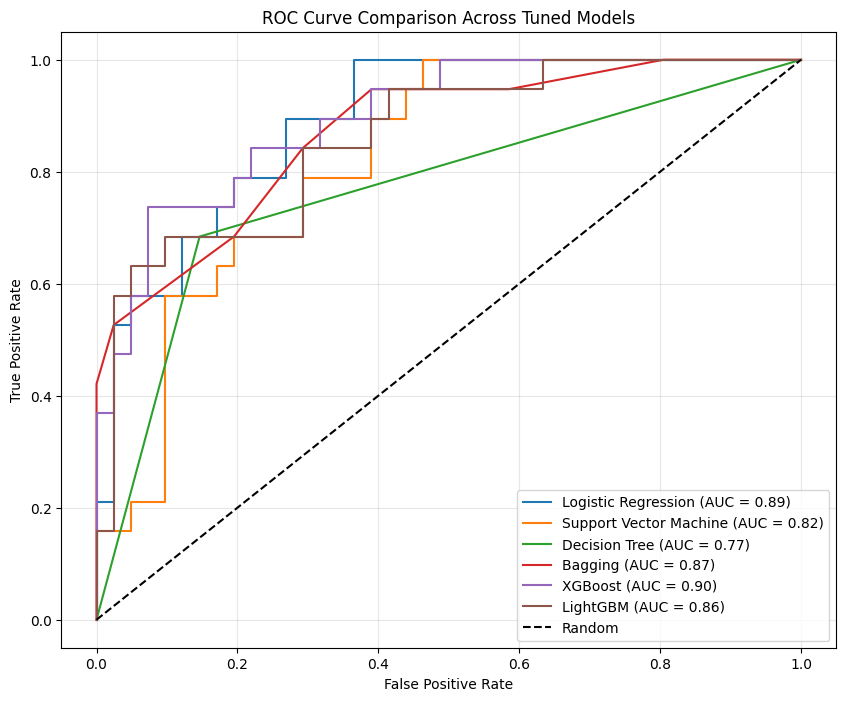

In [11]:
if 'tuned_results' in locals() and tuned_results:
    # Visualize Test Accuracy Scores for Tuned Models
    plt.figure(figsize=(12, 6))
    test_accuracies = [tuned_results[name]["Test Accuracy"] for name in tuned_results.keys()]
    model_names = list(tuned_results.keys())
    sns.barplot(x=model_names, y=test_accuracies, palette="viridis")
    plt.xticks(rotation=45, ha='right')
    plt.title('Test Accuracy Score Comparison Across Tuned Models')
    plt.ylabel('Accuracy')
    plt.ylim(0, 1)
    for i, v in enumerate(test_accuracies):
        plt.text(i, v + 0.02, f'{v:.2f}', ha='center')
    plt.tight_layout()
    plt.show()

    # Visualize ROC Curves for Tuned Models
    plt.figure(figsize=(10, 8))
    for name, metrics in tuned_results.items():
        if metrics["Test_FPR"] is not None and metrics["Test_TPR"] is not None:
            plt.plot(metrics["Test_FPR"], metrics["Test_TPR"], label=f'{name} (AUC = {metrics["Test ROC_AUC"]:.2f})')
        else:
             print(f"Skipping ROC curve plot for {name} as FPR/TPR are not available.")

    plt.plot([0, 1], [0, 1], 'k--', label='Random')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve Comparison Across Tuned Models')
    plt.legend(loc='lower right')
    plt.grid(alpha=0.3)
    plt.show()

else:
    print("Tuned model results not available for visualization. Please run the model tuning cell first.")

Next, we generated bar plots to compare the test accuracy of the tuned models and plotted ROC curves for each model on the test set. It can be observed that XGBoost has the highest AUC followed by Logistic regression and Bagging. This signifies that the model is good at distinguishing between the positive and negative classes.

### Feature Importance Analysis

Analyze the feature importance for tree-based models (XGBoost, LightGBM, Decision Tree, Bagging) after tuning.

[LightGBM] [Info] Number of positive: 5022, number of negative: 5022
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001399 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3060
[LightGBM] [Info] Number of data points in the train set: 10044, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


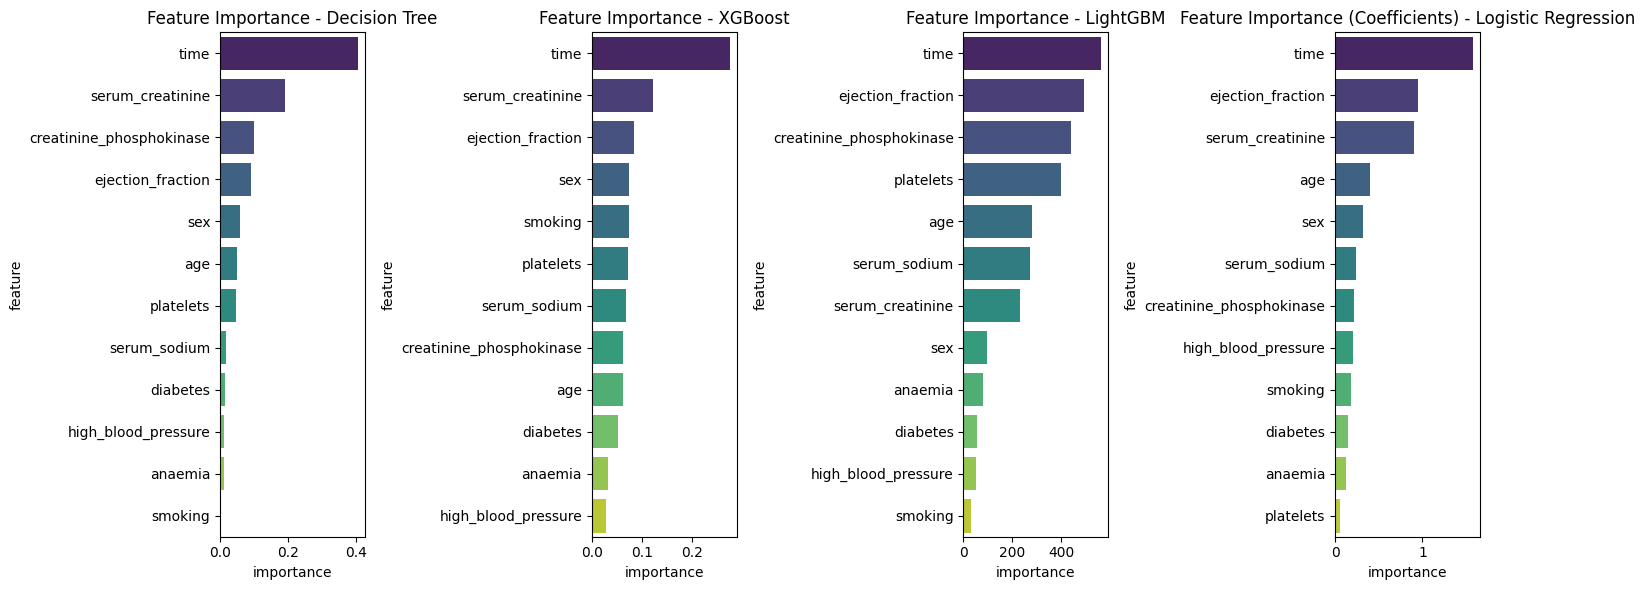

In [13]:
if 'tuned_results' in locals() and tuned_results:
    plt.figure(figsize=(15, 6))
    plot_count = 0
    for name in ["Decision Tree", "Bagging", "XGBoost", "LightGBM", "Logistic Regression"]:
        if name in tuned_results and "Best Parameters" in tuned_results[name]:
            # Retrieve the best estimator for the model
            # This assumes the GridSearchCV object from the previous cell is accessible,
            # or that we can rebuild the best estimator from stored best parameters.
            # Since the GridSearchCV objects are not stored, we will rebuild the best estimator
            # using the stored best parameters and the original model object structure.

            try:
                best_params = tuned_results[name]["Best Parameters"]
                # Extract model parameters from pipeline parameters
                model_params = {k.replace('model__', ''): v for k, v in best_params.items()}

                # Get the original model class from the models dictionary
                original_model_class = models[name].__class__

                # Instantiate the model with best parameters and random state
                model = original_model_class(**model_params, random_state=42)

                # Create and fit a pipeline with the best model on the augmented data
                pipeline = Pipeline([('scaler', StandardScaler()), ('model', model)])
                # Use the scaled augmented data for fitting the pipeline
                pipeline.fit(X_train_scaled, y_train_aug) # Use X_train_scaled (numpy array) for fitting

                # Access feature importances from the fitted model within the pipeline
                if hasattr(pipeline.named_steps['model'], 'feature_importances_'):
                    feature_importance = pd.DataFrame({
                        # Use the columns from the original X DataFrame for feature names
                        'feature': X.columns,
                        'importance': pipeline.named_steps['model'].feature_importances_
                    })

                    plot_count += 1
                    # Adjust subplot grid based on number of models with importance
                    plt.subplot(1, 4, plot_count)
                    sns.barplot(data=feature_importance.sort_values('importance', ascending=False), x='importance', y='feature', palette='viridis')
                    plt.title(f'Feature Importance - {name}')
                    plt.tight_layout() # Ensure layout is adjusted within the loop

                # For Logistic Regression, use coefficients as a proxy for importance
                elif hasattr(pipeline.named_steps['model'], 'coef_'):
                    coefficients = pipeline.named_steps['model'].coef_[0]
                    feature_importance = pd.DataFrame({
                        'feature': X.columns,
                        'importance': np.abs(coefficients) # Use absolute value of coefficients
                    })
                    plot_count += 1
                    # Adjust subplot grid based on number of models with importance
                    plt.subplot(1, 4, plot_count)
                    sns.barplot(data=feature_importance.sort_values('importance', ascending=False), x='importance', y='feature', palette='viridis')
                    plt.title(f'Feature Importance (Coefficients) - {name}')
                    plt.tight_layout()


            except Exception as e:
                print(f"Could not plot feature importance for {name}: {e}")
        else:
            print(f"Tuned results or best parameters not found for {name}. Skipping feature importance plot.")

    if plot_count > 0:
        plt.show()
    else:
        print("No tree-based models with feature importance found or plotted.")

else:
    print("Tuned model results not available for feature importance analysis. Please run the model tuning cell first.")

Finally, we analyzed the feature importance for tree-based models and the coefficients for Logistic Regression from the fitted models. The three top features were time, serum_creatinine and ejection_fraction. Understanding which features are most influential in the model's predictions can provide valuable clinical insights and help in feature selection for future work.

### Conclusion

This project successfully analyzed the Heart Failure Clinical Records Dataset to predict patient mortality (`DEATH_EVENT`). Initial exploratory data analysis revealed class imbalance in the target variable, which was addressed using SMOTE to balance the training data. Data augmentation was also applied by adding noise to numerical features, increasing the training set size to over 10,000 rows to improve model robustness.

Several classification models were trained and evaluated, with hyperparameter tuning performed via GridSearchCV with cross-validation. Among the tested models, **XGBoost** demonstrated the strongest performance on the test set, exhibiting the highest accuracy (0.85) and F1-score (0.74), along with a high ROC AUC (0.90). Logistic Regression also showed competitive performance with a good ROC AUC (0.89). A **confusion matrix** was also generated for the best-performing model (XGBoost) to understand its prediction performance in more detail, showing the counts of true positives, true negatives, false positives, and false negatives.

Feature importance analysis consistently identified **`time`**, **`serum_creatinine`**, and **`ejection_fraction`** as the most influential features in predicting the `DEATH_EVENT` across tree-based models and through Logistic Regression coefficients. This reinforces their clinical significance in heart failure outcomes.

Based on these findings, predictive models, especially the tuned XGBoost classifier utilizing these key clinical markers, show significant promise as valuable tools for healthcare professionals. They could potentially assist in identifying patients at higher risk, enabling more targeted interventions and personalized care plans. Future work should focus on validating these models on larger and more diverse datasets and exploring their potential for clinical implementation.